**<h1>Importing Libraries**

In [257]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas_datareader as web
import yfinance as yf

**<h2>Uploading Trained Model From Drive**

I saved the trained model in my drive as I thought we might need to do that in the deployment phase. The link to the folder on [my drive](https://drive.google.com/drive/folders/1ybT0HJoFh4TI7Zp8st3kHEQQEwfldmbu?usp=sharing).

In [258]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [259]:
from tensorflow.keras.models import load_model
path=r'/content/drive/My Drive/LSTM STOCK MODEL/stock_model.h5'
new_model=load_model(path)

**<h2> Model Forecast and Plot Series Functions**

In [302]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [260]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

**<h2>Uploading the dataset**

A dataset of 114 days is being used for predictions.

In [278]:
df=web.DataReader('GOOGL',data_source='yahoo',start='02-1-2020',end='07-15-2020')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-03,1486.300049,1456.609985,1461.650024,1482.599976,3608800,1482.599976
2020-02-04,1467.339966,1422.030029,1454.489990,1445.410034,4794000,1445.410034
2020-02-05,1464.579956,1429.680054,1463.609985,1446.050049,1818800,1446.050049
2020-02-06,1481.560059,1450.479980,1451.979980,1475.969971,1891100,1475.969971
2020-02-07,1485.250000,1465.410034,1467.390015,1479.109985,1418000,1479.109985


**<h2> Close Trend**

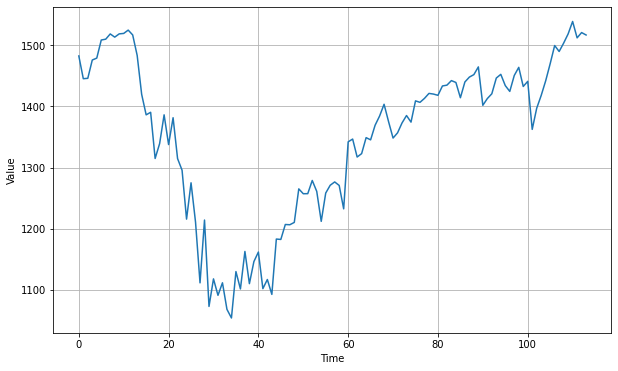

In [279]:
new_time_step=[]
for i in range(df.shape[0]):
  new_time_step.append(i)

close_data=df['Close']
new_time = np.array(new_time_step)
plt.figure(figsize=(10, 6))
plot_series(new_time,close_data)

**<h2> Preprocessing the Data**

In [280]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x= scaler.fit_transform(close_data.values.reshape(-1,1))
x[:5]

array([[0.88366187],
       [0.8069626 ],
       [0.80828254],
       [0.86998837],
       [0.87646423]])

In [265]:
x.shape

(3095, 1)

**<h2> Getting the forecasted values**

In [303]:
window_size=32
forecast=model_forecast(new_model,x,window_size)
forecast=forecast.reshape(-1,1)
results=[]
for i in range(len(forecast)):
    if(i%(window_size+1)==0):
          results.append(forecast[i])
len(results)

81

**<h2>Increasing the time for forecasting**

In [ ]:
time_prd=new_time+len(new_time)
time_prd[-1:]
a=[]
for i in range(227,1000):
  a.append(i)
time_prd=np.append(time_prd,a)
time_prd.max()

999

**<h2>Plotting the Graph and Comparing**

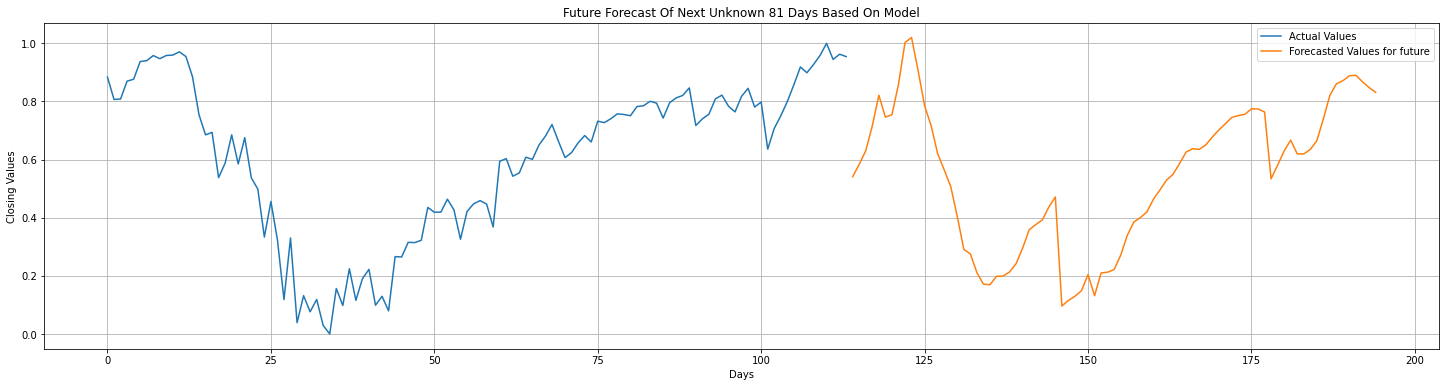

In [300]:
plt.figure(figsize=(25, 6))
plot_series(new_time,x)
plot_series(time_prd[:len(forecast)],forecast)
plt.legend(['Original Values','Predicted Values'])
plt.xlabel('Days')
plt.ylabel('Closing Values')
plt.title('Future Forecast Of Next Unknown {} Days Based On Model'.format(len(forecast)))
plt.legend(['Actual Values','Forecasted Values for future'])

**<h1> Issues**


 I tried to make more predictions by inputting more data for forecasting but the graph became extremely unstable.So, it seems like only a certain amount of data can be fed for forecasting so far.Either that or my proposed solution needs to be altered more/discarded.
